In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii

%matplotlib inline

If you have multiple massSample and membership files, you need to combine them first via e.g.,
```
paste -d" " *.membership > cluster.membership
paste -d" " *.massSamples > cluster.massSamples
```

In [64]:
sm = r"C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\sampleMassSplit_run3_trimphot_run15res\NGC6819.massSamples"
mem = r"C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\sampleMassSplit_run3_trimphot_run15res\NGC6819.membership"
ph = r"C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\sampleMassSplit_run3_trimphot_run15res\NGC6819.phot"

In [65]:
phot = pd.read_csv(ph, sep='\s+')
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
9,100630010,13.3022,12.9060,12.3800,12.0310,11.8690,0.0541,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
10,107780011,13.3640,12.7440,12.2500,11.9300,11.7740,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
14,100330015,13.3066,12.6870,12.2810,12.0270,11.9090,0.0126,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,122022545,99.9000,20.7890,20.0301,19.7208,19.4754,-9.9000,0.0546,0.0477,0.0141,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2552,120632553,99.9000,20.8465,20.1611,19.8219,19.5825,-9.9000,0.0590,0.0359,0.0378,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2556,121432557,99.9000,99.9000,20.4512,19.9766,19.7743,-9.9000,-9.9000,0.0736,0.1447,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2565,123932566,99.9000,99.9000,19.9558,99.9000,99.9000,-9.9000,-9.9000,0.0570,-9.9000,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [66]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
# phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
#                 & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [67]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames = (massesNames[massesNames != ''])
massesNames

array(['100300001', '100300001', '108640002', ..., '105550126',
       '104720127', '104720127'], dtype='<U9')

In [68]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)

(10000, 2516)
1258.0


In [69]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(10000, 1258)


In [70]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['id'] == iden)]
    #print(row['id'])
    
    # get the column in the membership file
    imem = int(i/2)
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
    # add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)
        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True

            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster)

169 484 0.34917355371900827 0.026859504132231406


In [71]:
phot

,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,0.401764,0.279740,0.974647,0.048065,True,False
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
9,100630010,13.3022,12.9060,12.3800,12.0310,11.8690,0.0541,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,0.449072,0.256436,0.860521,0.072608,True,False
10,107780011,13.3640,12.7440,12.2500,11.9300,11.7740,0.0100,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,0.316357,0.203210,0.986281,0.032865,True,False
14,100330015,13.3066,12.6870,12.2810,12.0270,11.9090,0.0126,-9.9000,-9.9000,-9.9000,...,-1,-1,-1,-1,0.469398,0.249257,0.987562,0.033969,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,122022545,99.9000,20.7890,20.0301,19.7208,19.4754,-9.9000,0.0546,0.0477,0.0141,...,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,False,False
2552,120632553,99.9000,20.8465,20.1611,19.8219,19.5825,-9.9000,0.0590,0.0359,0.0378,...,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,False,False
2556,121432557,99.9000,99.9000,20.4512,19.9766,19.7743,-9.9000,-9.9000,0.0736,0.1447,...,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,False,False
2565,123932566,99.9000,99.9000,19.9558,99.9000,99.9000,-9.9000,-9.9000,0.0570,-9.9000,...,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,False,False


Text(0, 0.5, 'g_ps')

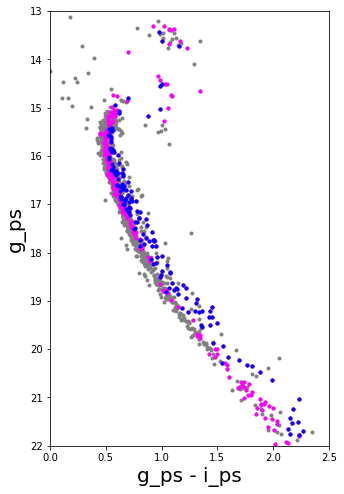

In [90]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 2.5)
ax.set_ylim(22, 13)
ax.set_xlabel("g_ps - i_ps", fontsize=20)
ax.set_ylabel("g_ps", fontsize=20)

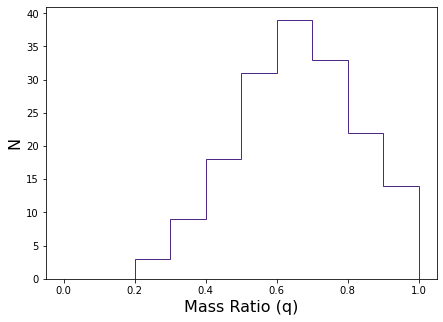

In [167]:
f, ax = plt.subplots(figsize=(7,5))
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], histtype='step', color="#4e2a84" ,bins=10, range=[0,1])
ax.set_xlabel("Mass Ratio (q)", fontsize=16)
ax.set_ylabel("N", fontsize=16)
plt.savefig("massratio.pdf", dpi=300)

In [148]:
GaiaData = ascii.read(r"C:\Users\Claire\Documents\Code\BASE9_utils\getGaiaData\GaiaData.ecsv")
GaiaData

source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PPM,PPa,PRV
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
2076266566193173888,295.25236581165257,39.57104101953475,-2.4096074753780066,-5.720345495348615,--,16.869741,950.54517,17.254961,171.67053,16.234373,215.5713,0.19123775117488687,--,1.336054,1,0,17.3425998687744,0.00464399997144938,16.8504009246826,0.00527000008150935,16.6200008392334,0.00329399993643165,16.5121002197266,0.00647900020703673,16.4440994262695,0.00427900021895766,15.58,0.048,15.259,0.078,15.087,0.146,0.0029826944,0.006912654,0.006296871,1.1228531508882107e-65,2.0326618089633084e-195,--
2076274121030080768,295.4489694033215,39.69284557539284,-4.73611019401259,-5.34396478925974,--,19.31945,374.4482,19.861364,25.261162,18.694342,45.431305,0.011103533414176364,--,1.0893166,1,0,19.922700881958,0.0144180003553629,19.3251991271973,0.0256340000778437,19.0519008636475,0.0123089998960495,18.9311008453369,0.0156699996441603,18.8309001922607,0.01919100061059,--,--,--,--,--,--,0.0039999066,0.04307092,0.024195414,6.370100259155416e-96,0.0,--
2076314356282928000,296.1553075240006,39.855772732307415,-4.00509235598971,-6.122884126671195,--,19.797083,267.21756,20.358688,18.667744,19.224216,27.200178,0.36651824074707823,--,0.95358175,1,0,20.4706993103027,0.0575740002095699,19.7728004455566,0.0195579994469881,19.5685997009277,0.0227439999580383,19.4412002563477,0.0437560006976128,19.3293991088867,0.0474999994039536,--,--,--,--,--,--,0.004909247,0.058227967,0.040095028,2.5886244941358143e-111,0.09995583741006367,--
2076326386495096192,295.82123977611104,39.989672371920925,-3.407556263324567,-4.329111018823428,--,19.031412,449.68585,19.53153,37.28014,18.491291,58.491043,0.08897964743128783,--,1.0444802,1,0,19.5865993499756,0.0132870003581047,19.0368995666504,0.00558800017461181,18.8076992034912,0.00923299975693226,18.7187995910645,0.0228509996086359,18.665599822998,0.0291930008679628,--,--,--,--,--,--,0.0036635057,0.029257065,0.018943276,7.246208609284327e-08,0.0,--
2076354320952487936,296.11925680947166,40.11376089058507,-4.663088350963651,-5.296098421225916,--,20.35321,185.3959,20.809004,10.77041,19.679617,15.26463,0.33240334219673745,--,1.0168872,1,0,21.1424007415771,0.0371289998292923,20.3948001861572,0.0401199981570244,20.0718994140625,0.0307000000029802,19.8743991851807,0.0279879998415709,19.7226009368896,0.127187997102737,--,--,--,--,--,--,0.006472107,0.10084593,0.071227916,6.1885147273764205e-89,7.150692863670478e-05,--
2076225914317021184,295.573119735533,39.64090353065577,-2.018232994159313,-5.804070403696139,--,20.329252,178.75284,21.033373,10.323545,19.580933,21.8121,0.6523808571362336,--,0.9384223,1,0,21.0939998626709,0.0285539999604225,20.32200050354,0.0347970016300678,19.9778995513916,0.016890000551939,19.8369007110596,0.0296349991112947,19.622200012207,0.043724998831749,--,--,--,--,--,--,0.006669684,0.10520787,0.049920056,6.367178206719019e-81,8.837324671865757e-40,--
2076225914317022080,295.5777695243631,39.64175597145176,-3.3261396281787325,-4.528344258323801,--,19.833324,267.81485,20.346642,18.358843,19.213356,36.429432,0.04536891055860491,--,1.1091361,1,0,

In [151]:
GaiaData.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','radial_velocity','phot_g_mean_mag','phot_g_mean_flux_over_error','phot_bp_mean_mag','phot_bp_mean_flux_over_error','phot_rp_mean_mag','phot_rp_mean_flux_over_error','parallax','teff_gspphot','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom','phot_g_mean_mag_error','phot_bp_mean_mag_error','phot_rp_mean_mag_error','PPM','PPa','PRV')>

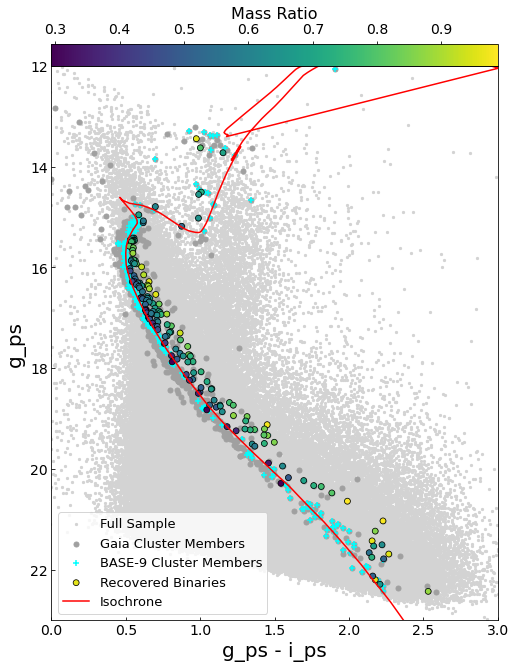

In [156]:
# from Erin Motherway
# plot CMD with a colorbar showing mass ratio

r = photBinary['qMean']
f, ax = plt.subplots(figsize=(8,12))
ax.set_xlabel('g_ps - i_ps',fontsize=20)
ax.set_ylabel('g_ps',fontsize=20)
#plot phot and cluster members
plt.scatter(GaiaData['g_mean_psf_mag'] - GaiaData["i_mean_psf_mag"], GaiaData["g_mean_psf_mag"], s=5, color="#D3D3D3", label="Full Sample")
plt.scatter(phot['g_ps'] - phot['i_ps'], phot['g_ps'],s=25, color='#A0A0A0', label="Gaia Cluster Members")
plt.scatter(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],s=35, color='cyan', marker="+", label="BASE-9 Cluster Members")
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')


ax.set_xlim(0, 3)
ax.set_ylim(23, 12)
#plot colorbar
plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75, label="Recovered Binaries")
cbar = plt.colorbar(orientation="horizontal",pad=0,location='top')
cbar.set_label("Mass Ratio", fontsize=16)
tick_font_size = 14
cbar.ax.tick_params(labelsize=tick_font_size)

cmdfile = r"C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\makeCMDout_2\NGC6819.ms"
mag     = "g_ps"
color     = "g_ps-i_ps".split('-')

header = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red', label="Isochrone")
ax.legend(fontsize=13,loc="lower left")
ax.tick_params(which = 'major', direction = 'in', labelsize = 14)
plt.savefig('cmdWithMassRatio.pdf', dpi=300)

plt.show()

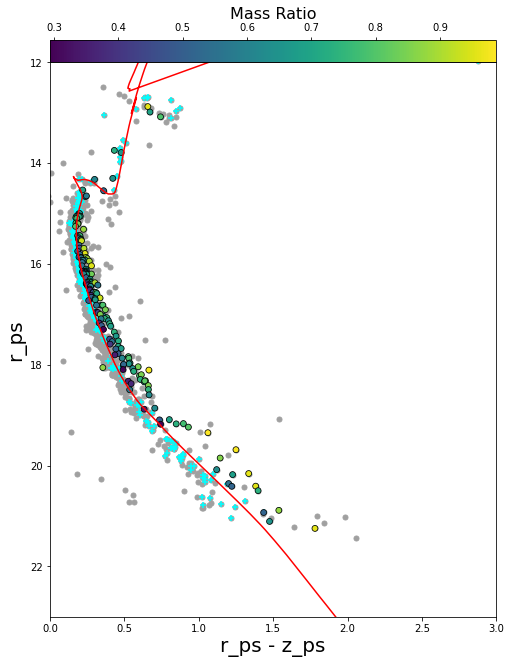

In [119]:
# from Erin Motherway
# plot CMD with a colorbar showing mass ratio

r = photBinary['qMean']
f, ax = plt.subplots(figsize=(8,12))
ax.set_xlabel('r_ps - z_ps',fontsize=20)
ax.set_ylabel('r_ps',fontsize=20)
#plot phot and cluster members
plt.scatter(phot['r_ps'] - phot['z_ps'], phot['r_ps'],s=25, color='#A0A0A0')
plt.scatter(photMems['r_ps'] - photMems['z_ps'], photMems['r_ps'],s=35, color='cyan', marker="+")
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)
#plot colorbar
plt.scatter(photBinary['r_ps'] - photBinary['z_ps'], photBinary['r_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75)
cbar = plt.colorbar(orientation="horizontal",pad=0,location='top')
cbar.set_label("Mass Ratio", fontsize=16)

cmdfile = r"C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\makeCMDout_2_r-z_r\NGC6819.ms"
mag     = "r_ps"
color     = "r_ps-z_ps".split('-')

header = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red')

plt.savefig('cmd.png')

plt.show()